In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import VerticalPitch, Pitch
import seaborn as sns
import warnings
import numpy as np
import ipywidgets as widgets
from highlight_text import  ax_text, fig_text

#Read in the data
df = pd.read_csv('Msiapass.csv', encoding='latin-1')

#Passes that reached the penalty area
df['penalty_area']= np.where((df['Y2'].between(22,78)) & ((df['X2']> 85)), 1, 0)
df = df.loc[df['penalty_area']== 1]

#Adjust to pitch size
df['X'] = df['X']*1.2
df['Y'] = df['Y']*.8
df['X2'] = df['X2']*1.2
df['Y2'] = df['Y2']*.8

#Split as successful (Sdf) and unsuccessful (Udf)
Sdf = df[df['Event']=='Pass']
Udf = df[df['Event']=='U Pass']

df.head(5)

,Player,Event,X,Y,X2,Y2,penalty_area
4,Corbin-Ong,Pass,114.0,60.8,106.8,31.2,1
5,Matt Davies,Pass,106.8,33.6,112.8,32.0,1
10,Matt Davies,U Pass,118.8,18.4,114.0,38.4,1
17,Matt Davies,Pass,103.2,8.0,108.0,48.8,1
19,Corbin-Ong,Pass,117.6,64.0,103.2,52.8,1


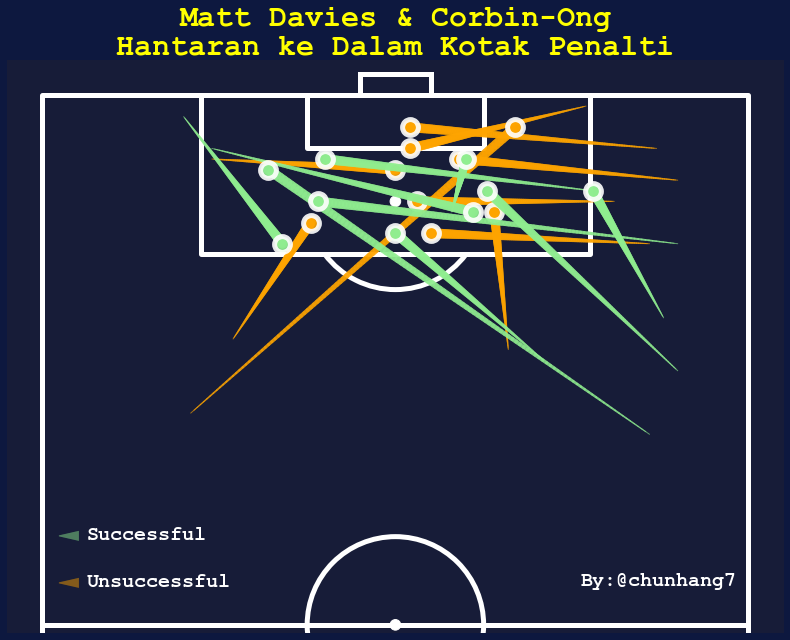

In [53]:
pitch = VerticalPitch(pad_bottom=0.9,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      pitch_type='statsbomb', 
                      pitch_color='#171c38', 
                      line_color='white',
                      linewidth=5, 
                      spot_scale=0.005)

fig, ax = pitch.draw(figsize=(13, 9))
fig.set_facecolor('#0d183f')

plt.gca().invert_xaxis()

#plot the locations
#Successful Passes inside the box
if Sdf.empty == False:
    pitch.lines(Sdf.X,Sdf.Y,Sdf.X2,Sdf.Y2,comet=True,ax=ax,
           linewidth=10, capstyle='round', zorder=8,
           alpha=0.6, color = 'lightgreen', label='Successful')
    
    pitch.scatter(Sdf.X2,Sdf.Y2, edgecolors= 'w', c='lightgreen',
              s = 250, zorder=8, ax=ax, marker = 'o', alpha = 0.9,linewidths=5)
    
#Unsuccessful Passes inside the box
if Udf.empty == False:
    pitch.lines(Udf.X,Udf.Y,Udf.X2,Udf.Y2,comet=True,ax=ax,
           linewidth=10, capstyle='round', zorder=7,
           alpha=0.6, color = 'orange', label='Unsuccessful')
    
    pitch.scatter(Udf.X2,Udf.Y2, edgecolors= 'w', c='orange',
              s = 250, zorder=7, ax=ax, marker = 'o', alpha = 0.9,linewidths=5)
    
plt.title("Matt Davies & Corbin-Ong\nHantaran ke Dalam Kotak Penalti",color='yellow',size=30, fontfamily = "Courier New", fontweight = "bold")

# setup the legend
legend = ax.legend(loc='center left', bbox_to_anchor=(0.055, 0.13),facecolor='#171c38', edgecolor='None',
                   labelspacing=3)

for text in legend.get_texts():
    text.set_fontsize(20)
    text.set_fontfamily("Courier New")
    text.set_fontweight("bold")
    text.set_color('white')


#credits
fig.text(.865,.09,'By:@chunhang7',fontsize=20,fontfamily='Courier New',ha='right',color='w',fontweight='bold')

plt.show()

# Horizontal Pitch

In [11]:
#Read in the data
df = pd.read_csv('BG.csv', encoding='latin-1')
df = df.loc[((df['Event'] == 'Pass') | (df['Event'] == 'U Pass'))]

#Adjust to pitch size
df['X'] = df['X']*1.2
df['Y'] = df['Y']*.8
df['X2'] = df['X2']*1.2
df['Y2'] = df['Y2']*.8

#filter for player
df = df[df['Player'] == 'Brendan Gan']
total = len(df.index)

#Split as successful (Sdf) and unsuccessful (Udf)
Sdf = df[df['Event']=='Pass']
s = len(Sdf.index)

Udf = df[df['Event']=='U Pass']
u = len(Udf.index)

completion = (s / total)*100
completion = round(completion,2)

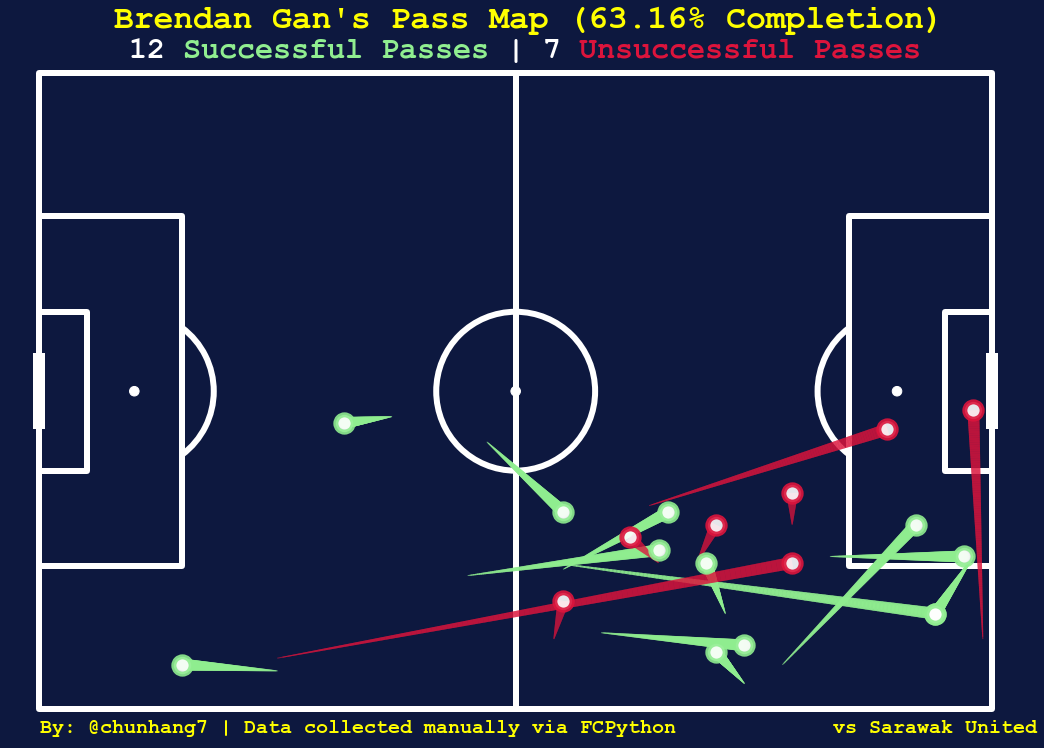

In [14]:
#Make the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#0d183f', line_color='white',linewidth=6, spot_scale=0.005)
fig, ax = pitch.draw(figsize=(15, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#0d183f')

#Inverse y-axis
plt.gca().invert_yaxis()

#Plot Successful Passes
pitch.lines(Sdf.X,Sdf.Y,Sdf.X2,Sdf.Y2,
            comet=True,ax=ax, linewidth=12, capstyle='round', 
            alpha=0.6, color ='lightgreen')

pitch.scatter(Sdf['X2'], Sdf['Y2'],
              edgecolors= "lightgreen", c="w", s = 300, zorder=4, ax=ax, 
              marker = 'o', alpha = 0.9,linewidths=5, label='Successful Passes')

#Plot Unsuccessful Passes
pitch.lines(Udf.X,Udf.Y,Udf.X2,Udf.Y2,
            comet=True,ax=ax, linewidth=12, 
            alpha=0.6, color ='crimson')

pitch.scatter(Udf['X2'], Udf['Y2'],
              edgecolors= "crimson", c="w", s = 300, zorder=4, ax=ax, 
              marker = 'o', alpha = 0.9,linewidths=5, label='Unuccessful Passes')

#Title & Annotations
fig.suptitle("Brendan Gan's Pass Map ("+str(completion)+"% Completion)\n", fontsize=33, color='yellow',
            fontfamily = "Courier New", fontweight = "bold",x=0.512,y=0.94)

highlight_textprops =\
    [{"color": "lightgreen","fontweight": 'bold'},
     {"color": "crimson","fontweight": 'bold'}
    ]

Title = fig_text(s = str(s) + " <Successful Passes> | " + str(u) + " <Unsuccessful Passes>" ,
        x = 0.509, y = 0.9, highlight_textprops = highlight_textprops ,color='white',
        fontfamily = "Courier New",fontweight='bold', ha='center',fontsize=30);

#Credits
ax.text(0.1, -2.5, 'By: @chunhang7 | Data collected manually via FCPython', va='center', ha='left', fontsize=20, color='yellow',
        fontweight = "bold",fontfamily = "Courier New")

ax.text(100, -2.5, "vs Sarawak United", va='center', ha='left', fontsize=20, color='yellow',
        fontweight = "bold",fontfamily = "Courier New")

plt.show()